In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data.csv")
print(df.shape[0])
df.head()
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
y = df.iloc[:,2]

10


In [2]:
b0 = 0
b1 = 0
b2 = 0
beta1 = []
beta2 = []
predicted = []
err = []
alpha = 0.1
for i in range(df.shape[0]):
    z = b0 + (b1*x1[i]) + (b2*x2[i])
    pred = 1/(1+np.exp(-z))
    predicted.append(pred)
    error = pred - y[i]
    err.append(error)
    b0 = b0 - (alpha*error*pred*(1-pred))
    b1 = b1 - (alpha*error*pred*(1-pred)*x1[i])
    b2 = b2 - (alpha*error*pred*(1-pred)*x2[i])
    beta1.append(b1)
    beta2.append(b2)
print(b0,b1,b2)

-0.003446061600730861 0.2059278205762547 -0.0401734786643243


In [10]:
count = 0

for i in range(df.shape[0]):
    if predicted[i] > 0.5:
        predicted[i] = 1
    else:
        predicted[i] = 0
    if y[i] - predicted[i] == 0 :
        count = count + 1
accuracy = (count/df.shape[0])*100
print(accuracy)

print(predicted)

80.0
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]


In [4]:
print(err,beta1,beta2)

[0.5, 0.4653669995826232, 0.38688560399284316, 0.4175993809240572, 0.3325953249704773, -0.7943164185164152, -0.5906648417622669, -0.44323786085860706, -0.24243148257330238, -0.2503874722330479] [-0.03476355, -0.05173150451471671, -0.08290217900453702, -0.0970000290991413, -0.11962148182658822, -0.020636185784465966, 0.05551687252858073, 0.1312371932973333, 0.16986414283805085, 0.2059278205762547] [-0.0318817125, -0.05923123853402361, -0.09961328718601623, -0.11840493616772371, -0.1405925308490865, -0.10478456547631013, -0.07495669982806315, -0.05558455752626658, -0.05666236433598049, -0.0401734786643243]


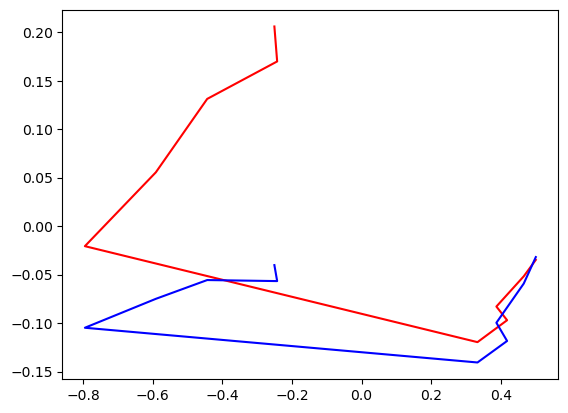

In [5]:
plt.plot(err,beta1,color = 'red')
plt.plot(err,beta2,color = 'blue')

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [13]:
x = np.array(df.iloc[:,0:2])
print(x)
model = LogisticRegression(solver='liblinear')
model.fit(x, y)

[[ 2.781084  2.550537]
 [ 1.465489  2.362125]
 [ 3.396562  4.400294]
 [ 1.38807   1.85022 ]
 [ 3.064072  3.005306]
 [ 7.627531  2.759262]
 [ 5.332441  2.088627]
 [ 6.922597  1.771064]
 [ 8.675419 -0.24207 ]
 [ 7.673756  3.508563]]


LogisticRegression(solver='liblinear')

In [14]:
y_pred = model.predict(x)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [15]:
count = 0

for i in range(df.shape[0]):
    if y[i] - y_pred[i] == 0 :
        count = count + 1
accuracy = (count/df.shape[0])*100
accuracy

100.0

**CONCLUSION :IN BOTH THE CASES WE GOT AN ACCURACY OF 60% FOR ONE EPOCH**